In [ ]:
!ls COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/

Which State? Indiana
 
 
 
 
 


<IPython.core.display.Javascript object>


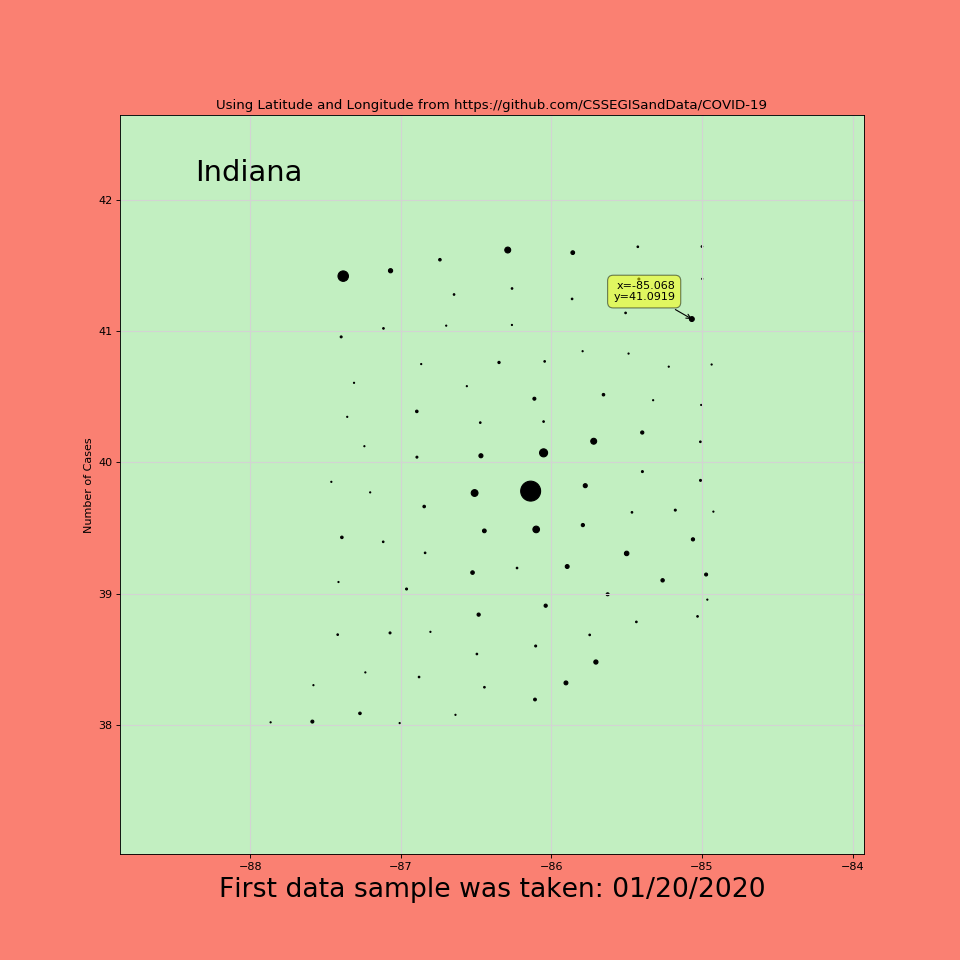

Textarea(value='', description='event:', placeholder='')

In [1]:
%matplotlib notebook
import mplcursors
from matplotlib.pyplot import text
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import numpy as np
#import mpld3
#from mpld3 import plugins
from PIL import Image
import ipywidgets as wdg 
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-15-2020.csv"

DataIn = open(LASTFILE).readlines()
cnt=-1
LAT =[]
LON =[]
cases = []
COORD=[]
STate = input("Which State? ")
for lines in DataIn:
    lines = lines.replace("\n","")
    line = lines.split(",")
    if STate in line[2] and len(line[5])>8 and len(line[6])>4:
        cnt=cnt+1
        if cnt<5:
            print(" ")
            #print(line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8])
        LAT.append(line[5]) 
        LON.append(line[6])
        cases.append(int(line[7]))
LA = LAT
LO = LON
X = np.array(LAT,dtype=np.float)
Y = np.array(LON,dtype=np.float)
LT = np.array(LAT,dtype=np.float)
LG = np.array(LON,dtype=np.float)

fig = plt.figure(num=None, figsize=(12,12), dpi=80, facecolor='salmon')
ax = fig.gca()
ax.set_facecolor(('#c2efc1'))

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

A =(min(LG))-1
B =(max(LG))+1
C =(min(LT))-1
D =(max(LT))+1

ax = fig.gca()
T= STate
#plt.text(41.5,-76.0, T,fontsize=20)
plt.text(A+.5, D-.5, STate, fontsize=26)
# Create and display textarea widget
txt = wdg.Textarea(
    value='',
    placeholder='',
    description='event:',
    disabled=False
)
display(txt)

#COORD.append(txt)
# Define a callback function that will update the textarea
def onclick(event):
    txt.value = str(event)  # Dynamically update the text box above
    COORD.append(txt.value) 
# Create an hard reference to the callback not to be cleared by the garbage collector
ka = fig.canvas.mpl_connect('button_press_event', onclick)

plt.axis([A,B,C,D])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.grid(True)
plt.scatter(Y, X, s=s, color="black")


plt.xlabel('First data sample was taken: 01/20/2020', fontsize=24)
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
mplcursors.cursor(hover=True)

plt.show()

In [2]:
import reverse_geocoder as rg 
import pprint 
TXT = ""
def Reverse(tuples): 
    new_tup = tuples[::-1] 
    return new_tup   
def reverseGeocode(coordinates): 
    result = rg.search(coordinates) 
      
    # result is a list containing ordered dictionary. 
    pprint.pprint(result)  
for line in COORD:
    coordinates = ((str(line).split('xydata=('))[1].split(') button=1')[0])
    res = tuple(map(float, coordinates.split(', ')))
    dat = Reverse(res)
    TXT=TXT+str(dat)
    reverseGeocode(dat)

Loading formatted geocoded file...
[OrderedDict([('lat', '39.76838'),
              ('lon', '-86.15804'),
              ('name', 'Indianapolis'),
              ('admin1', 'Indiana'),
              ('admin2', 'Marion County'),
              ('cc', 'US')])]
[OrderedDict([('lat', '41.0706'),
              ('lon', '-85.01441'),
              ('name', 'New Haven'),
              ('admin1', 'Indiana'),
              ('admin2', 'Allen County'),
              ('cc', 'US')])]


In [3]:
from math import radians, sin, cos, acos
TXT=""
for line in COORD:
    coordinates = ((str(line).split('xydata=('))[1].split(') button=1')[0])
    res = tuple(map(float, coordinates.split(', ')))
    dat = Reverse(res)
    TXT=TXT+str(dat)
codata=str(TXT)
codata=codata.replace(")("," ")
codata=codata.replace("(","")
codata=codata.replace(")","")
codata=codata.replace(",","")
codata=codata.replace("  "," ")
print("Coordinate Source and Destination in Latitude and Longitude:\n ",codata)
codata=codata.split(" ")

latSrc = radians(float(codata[0]))
longSrc = radians(float(codata[1]))
latDest = radians(float(codata[2]))
longDest = radians(float(codata[3]))

dist = 6371.01 * acos(sin(latSrc)*sin(latDest) + cos(latSrc)*cos(latDest)*cos(longSrc - longDest))


# calculate miles
miles = dist * 0.621371
print("")
print("The aprox distance 'as the crow flies' is %.2fkm." % dist)
print('Aprox.%0.2f kilometers or %0.2f miles' %(dist,miles))

Coordinate Source and Destination in Latitude and Longitude:
  39.78022018341657 -86.14324814109321 41.097622990884105 -85.06763920552869

The aprox distance 'as the crow flies' is 172.46km.
Aprox.172.46 kilometers or 107.16 miles


## Empty the list COORD=[]

In [ ]:
# Empty the list COORD=[]
COORD=[]

In [ ]:
import DIST
help(DIST)

In [ ]:
from DIST import *
distance(COORD)

In [ ]:
%%writefile DIST.py
#!/usr/bin/env python
from math import radians, sin, cos, acos
# figure distance between two locations clicked in a plot.
# given in Lat and long results in Mile and kilometers

import math
def Reverse(tuples): 
    new_tup = tuples[::-1] 
    return new_tup   
def distance(COORD):
    TXT=""
    for line in COORD:
        coordinates = ((str(line).split('xydata=('))[1].split(') button=1')[0])
        res = tuple(map(float, coordinates.split(', ')))
        dat = Reverse(res)
        TXT=TXT+str(dat)
    codata=str(TXT)
    codata=codata.replace(")("," ")
    codata=codata.replace("(","")
    codata=codata.replace(")","")
    codata=codata.replace(",","")
    codata=codata.replace("  "," ")
    print("Coordinate Source and Destination in Latitude and Longitude:\n ",codata)
    codata=codata.split(" ")

    latSrc = radians(float(codata[0]))
    longSrc = radians(float(codata[1]))
    latDest = radians(float(codata[2]))
    longDest = radians(float(codata[3]))
    dist = 6371.01 * acos(sin(latSrc)*sin(latDest) + cos(latSrc)*cos(latDest)*cos(longSrc - longDest))
    # calculate miles
    miles = dist * 0.621371
    #print("")
    #print("The aprox distance 'as the crow flies' is %.2fkm." % dist)
    output ='%0.2f kilometers or %0.2f miles' %(dist,miles)
    return output

In [ ]:
from DIST import distance

Start = 40.5,-90
End =  42,-93
print(distance(Start, End))

In [ ]:
# Get input in kilometers
kilometers = float(input("Enter Kilometers: "))

# conversion factor
ConversionFactor = 0.621371

# Convert kilometers to miles
miles = kilometers * ConversionFactor
print('%0.2f kilometers is equal to %0.2f miles' %(kilometers,miles))

# Overlay Deaths (red) on the Cases (black)
#### size is proportional

Number of Cities:  26
Total Deaths:  328
26
26
-102.6022199
-108.5958857
37.33859579
40.66671597


<IPython.core.display.Javascript object>


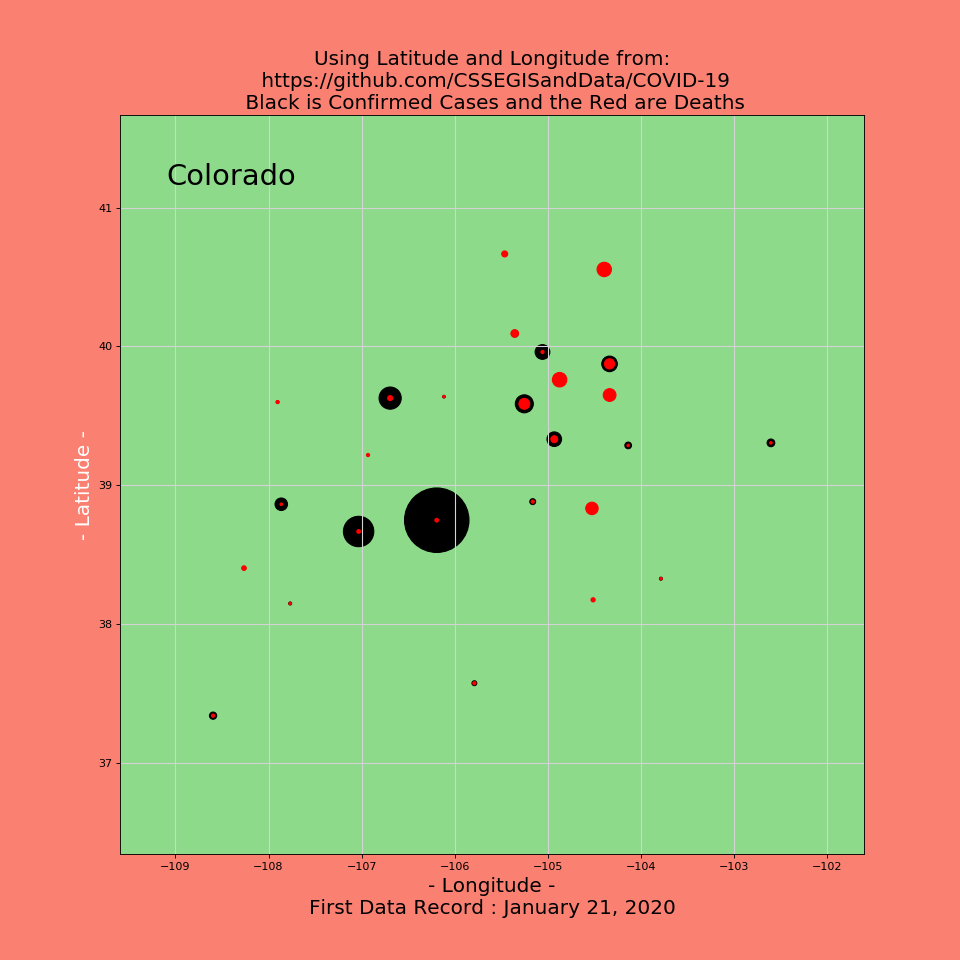

Text(-109.0958857, 41.16671597, 'Colorado')

[-109.5958857, -101.6022199, 36.33859579, 41.66671597]

Textarea(value='', description='event:', placeholder='')

Text(0.5, 0, '- Longitude -\nFirst Data Record : January 21, 2020')

Text(0.5, 1.0, 'Using Latitude and Longitude from:\n https://github.com/CSSEGISandData/COVID-19\n Black is Confirmed Cases and the Red are Deaths')

Text(0, 0.5, '- Latitude -')

images/Colorado_Fri_17_Apr_2020_12_28_12_AM_GMT.png


In [4]:
%matplotlib notebook
from matplotlib.pyplot import text
from matplotlib import pyplot as plt
import numpy as np
import mpld3
from mpld3 import plugins
import time
import mplcursors
import ipywidgets as wdg 
#%matplotlib inline
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
DataIn = open(LASTFILE).readlines()
cases=[]
for line in DataIn:
    if len(line)>10 and 'US' in line and "Recovered" not in line and "Unassigned" not in line:
        line=line.replace("\n","")
        line = line.lstrip(",")
        line = line.split(",")
        End=len(line)-1
        if len(line)>5 and "Florida" in line[6] and "Out of FL" not in line:
            cases.append(line[End])        

LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
CITY=[]
deaths=[]
TEXT=[]
COORD=[]
cnt = -1
Total=0
SEARCH = "Colorado"
for line in DataIn:
    if len(line)>10 and 'US' in line and "Recovered" not in line and "Unassigned" not in line:
        cnt=cnt+1
        line=line.replace("\n","")
        line = line.lstrip(",")
        line = line.split(",")
        End=len(line)-1
        if len(line)>5 and SEARCH in line[6] and "0.0" not in line:
            if cnt>=1 and cnt<=5:print(line[5],line[6],line[8],line[9], line[End] )
            Total=Total+int(line[End])
            CITY.append(line[5])
            LAT.append(line[8])
            LONG.append(line[9])
            deaths.append(line[End])        
            text = str(line[2]+' '+line[1]+' '+line[3]+' '+line[4]+' '+line[5]+' '+line[6]+' '+line[7]+' '+line[8]+' '+line[9]+' '+line[10])
            TEXT.append(text)
            
print("Number of Cities: ",len(CITY)) 
print("Total Deaths: ",Total)

LA = LAT
LO = LONG

print(len(LA))
print(len(LO))

DA = np.array(deaths,dtype=np.int)
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
X = np.array(LAT,dtype=np.float)
Y = np.array(LONG,dtype=np.float)
print (max(LG))
print (min(LG))
print (min(LT))
print (max(LT))

A = (min(LG))-1
B = (max(LG))+1
C = (min(LT))-1
D = (max(LT))+1

fig = plt.figure(num=None, figsize=(12,12), dpi=80, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))

Sd=1
Sized=[]
for xd in deaths:
    Sd=2+(float(xd)*3)
    Sized.append(int(Sd))
    #print(int(S))
sd = np.array(Sized)

S=1
Size=[]
for x in cases:
    S=2+(float(x)*1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

plt.text(A+.5, D-.5, SEARCH, fontsize=26)
#plt.text(-119, 41, SEARCH, fontsize=26)
#plt.axis([-130,-65,20,55])
ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(Y, X, s=s, color="black")
plt.axis([A,B,C,D])
# Create and display textarea widget
txt = wdg.Textarea(
    value='',
    placeholder='',
    description='event:',
    disabled=False
)
display(txt)


# Define a callback function that will update the textarea
def onclick(event):
    txt.value = str(event)  # Dynamically update the text box above
    COORD.append(txt.value)
# Create an hard reference to the callback not to be cleared by the garbage collector
ka = fig.canvas.mpl_connect('button_press_event', onclick)

plt.scatter(Y, X, s=sd, color="red")
plt.grid(True)

plt.xlabel('- Longitude -\nFirst Data Record : January 21, 2020', fontsize=18)
plt.title('Using Latitude and Longitude from:\n https://github.com/CSSEGISandData/COVID-19\n Black is Confirmed Cases and the Red are Deaths', fontsize=18)
plt.ylabel('- Latitude -', fontsize=18, color="white")
filename = "images/"+SEARCH+"_"+(time.strftime('%a_%d_%b_%Y_%I_%M_%S_%p_%Z', time.gmtime())+".png")
fig.savefig(filename, facecolor=fig.get_facecolor(), edgecolor='black')
print(filename)

mplcursors.cursor(hover=True)
plt.show()

In [ ]:
import reverse_geocoder as rg 
import pprint 
def Reverse(tuples): 
    new_tup = tuples[::-1] 
    return new_tup   
def reverseGeocode(coordinates): 
    result = rg.search(coordinates) 
      
    # result is a list containing ordered dictionary. 
    pprint.pprint(result)  

for line in COORD:
    coordinates = ((str(line).split('xydata=('))[1].split(') button=1')[0])
    res = tuple(map(float, coordinates.split(', ')))
    dat = Reverse(res)
    reverseGeocode(dat)

# The aprox distance between the two 'clicked locations'

In [ ]:
from math import radians, sin, cos, acos
TXT=""
for line in COORD:
    coordinates = ((str(line).split('xydata=('))[1].split(') button=1')[0])
    res = tuple(map(float, coordinates.split(', ')))
    dat = Reverse(res)
    TXT=TXT+str(dat)
codata=str(TXT)
codata=codata.replace(")("," ")
codata=codata.replace("(","")
codata=codata.replace(")","")
codata=codata.replace(",","")
codata=codata.replace("  "," ")
print("Coordinate Source and Destination in Latitude and Longitude:\n ",codata)
codata=codata.split(" ")

latSrc = radians(float(codata[0]))
longSrc = radians(float(codata[1]))
latDest = radians(float(codata[2]))
longDest = radians(float(codata[3]))

dist = 6371.01 * acos(sin(latSrc)*sin(latDest) + cos(latSrc)*cos(latDest)*cos(longSrc - longDest))


# calculate miles
miles = dist * 0.621371
print("")
print("The aprox distance 'as the crow flies' is %.2fkm." % dist)
print('Aprox.%0.2f kilometers or %0.2f miles' %(dist,miles))

In [ ]:
reset -f

# How the COORD list is used

In [ ]:
print(COORD)
#xydata=(  ) button=1

for line in COORD:
    coordinates = ((line.split('xydata=('))[1].split(') button=1')[0])


In [ ]:
TXT="""Textarea(value='button_press_event: xy=(258, 336) xydata=(-84.54645894452702, 39.19144800795269) button=1 dblclick=False inaxes=AxesSubplot(0.125,0.11;0.775x0.77)', description='event:', placeholder='')"""

In [ ]:
coordinates = ((TXT.split('xydata=('))[1].split(') button=1')[0])
print(coordinates)

In [ ]:
start = 'xydata=('
end = ') button=1'
stats = ((TXT.split(start))[1].split(end)[0])
print(stats)

In [ ]:
import reverse_geocoder as rg 
import pprint 
def Reverse(tuples): 
    new_tup = tuples[::-1] 
    return new_tup   
 
def reverseGeocode(coordinates): 
    result = rg.search(coordinates) 
      
    # result is a list containing ordered dictionary. 
    pprint.pprint(result)  

for line in COORD:
    coordinates = ((str(line).split('xydata=('))[1].split(') button=1')[0])
    data=coordinates.split(", ")
    data = Reverse(data)
    reverseGeocode(data)  

In [ ]:
import reverse_geocoder as rg 
import pprint 
  
def reverseGeocode(coordinates): 
    result = rg.search(coordinates) 
      
    # result is a list containing ordered dictionary. 
    pprint.pprint(result)  

LatLong =input("LatLong: ")
LatLong=LatLong.split(",")
print(LatLong[0],LatLong[1])
lat=LatLong[1]
lng=LatLong[0]

coordinates =(lat,lng) 
     
reverseGeocode(coordinates)  

# Get the Latitude and Longitude from a Plot

In [ ]:
https://simplemaps.com/data/us-cities

In [ ]:
-80.4875 26.1815

In [ ]:
%matplotlib notebook
import mplcursors
from matplotlib.pyplot import text
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import numpy as np
import mpld3
from mpld3 import plugins
from PIL import Image

LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-14-2020.csv"

DataIn = open(LASTFILE).readlines()
cnt=-1
LAT =[]
LON =[]
cases = []

STate = input("Which State? ")
for lines in DataIn:
    lines = lines.replace("\n","")
    line = lines.split(",")
    if STate in line[2] and len(line[5])>8 and len(line[6])>4:
        cnt=cnt+1
        if cnt<5:
            print(" ")
            #print(line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8])
        LAT.append(line[5]) 
        LON.append(line[6])
        cases.append(int(line[7]))
LA = LAT
LO = LON
LT = np.array(LAT,dtype=np.float)
LG = np.array(LON,dtype=np.float)

fig = plt.figure(num=None, figsize=(12,12), dpi=80, facecolor='salmon')
ax = fig.gca()
ax.set_facecolor(('#c2efc1'))

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

A =(min(LG))-1
B =(max(LG))+1
C =(min(LT))-1
D =(max(LT))+1


longLeft= (min(LG))-3
longRight = (max(LG))+3
lat1 = (min(LT))-3
lat2 = (max(LT))+3

ax = fig.gca()
T= STate
text(0.62, 0.29, T, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=20)

plt.axis([longLeft,longRight,lat1,lat2])

ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.grid(True)
plt.scatter(LG, LT, s=s, color="black")


plt.xlabel('First data sample was taken: 01/20/2020', fontsize=24)
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
mplcursors.cursor(hover=True)

plt.show()

In [ ]:
%matplotlib notebook
import mplcursors
from matplotlib.pyplot import text
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import numpy as np
import mpld3
from mpld3 import plugins
from PIL import Image

LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv"

DataIn = open(LASTFILE).readlines()
cnt=-1
LAT =[]
LON =[]
cases = []
STate = input("Which State? ")
for lines in DataIn:
    lines = lines.replace("\n","")
    line = lines.split(",")
    if STate in line[2] and len(line[5])>8 and len(line[6])>4:
        cnt=cnt+1
        if cnt<5:
            print(" ")
            #print(line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8])
        LAT.append(line[5]) 
        LON.append(line[6])
        cases.append(int(line[7]))
LA = LAT
LO = LON
LT = np.array(LAT,dtype=np.float)
LG = np.array(LON,dtype=np.float)

fig = plt.figure(num=None, figsize=(8,8), dpi=80, facecolor='salmon')
ax = fig.gca()
ax.set_facecolor(('#c2efc1'))

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

A =(min(LG))-1
B =(max(LG))+1
C =(min(LT))-1
D =(max(LT))+1

ax = fig.gca()
tx = max(LG)-.5
ty = max(LT)+.5

print(tx,ty)
text(tx, ty, STate, bbox=dict(facecolor='white', alpha=0.5))


plt.axis([A,B,C,D])

ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.grid(True)
plt.scatter(LG, LT, s=s, color="black")

plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
mplcursors.cursor(hover=True)

plt.show()

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import mplcursors
from matplotlib.pyplot import text

fig = plt.figure(num=None, figsize=(8,8), dpi=80, facecolor='salmon')
plt.grid(True)
plt.scatter(LG, LT, s=s, color="black")

plt.text(-108,40.5, "Mouse over a point", fontsize=20, color='red')


mplcursors.cursor(hover=True)

plt.show()


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from matplotlib.pyplot import text
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import numpy as np
import mpld3
%matplotlib inline  
from mpld3 import plugins
from PIL import Image
img=Image.open("mouse-sizing-n-cropping-files/soil600.jpg")

LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv"
#im = np.array(Image.open('mouse-sizing-n-cropping-files/soil600.jpg'))

DataIn = open(LASTFILE).readlines()
cnt=-1
LAT =[]
LON =[]
cases = []
STate = 'Florida'
for lines in DataIn:
    lines = lines.replace("\n","")
    line = lines.split(",")
    if STate in line[2] and len(line[5])>8 and len(line[6])>4:
        cnt=cnt+1
        if cnt<5:
            print(" ")
            #print(line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8])
        LAT.append(line[5]) 
        LON.append(line[6])
        cases.append(int(line[7]))
LA = LAT
LO = LON
LT = np.array(LAT,dtype=np.float)
LG = np.array(LON,dtype=np.float)

#fig = plt.figure(num=None, figsize=(8,8), dpi=80, facecolor='salmon')
ax = fig.gca()
ax.set_facecolor(('#c2efc1'))

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

A =(min(LG))-3
B =(max(LG))+3
C =(min(LT))-3
D =(max(LT))+3
#fig = plt.figure(num=None, figsize=(8,8), dpi=80, facecolor='salmon')
#fig, ax = plt.subplots(figsize=(8,8), dpi=80, facecolor='salmon')
#im = ax.imshow(img, extent=(A, B, C, D),
#               origin='upper', zorder=0, interpolation='nearest')
#plugins.connect(fig, plugins.MousePosition(fontsize=14))
#mpld3.display()

ax = fig.gca()
T= 'Miami-Dade'
text(0.62, 0.29, T, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

plt.axis([A, B, C, D])
#plugins.connect(ax, plugins.MousePosition(fontsize=14))

ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.grid(True)
plt.scatter(LG, LT, s=s, color="black")
fig, ax = plt.subplots(figsize=(8,8), dpi=80, facecolor='salmon')
plugins.connect(fig, plugins.MousePosition(fontsize=14))
im = ax.imshow(img, extent=(A, B, C, D),
               origin='upper', zorder=0, interpolation='nearest')

mpld3.display()

plt.show()
#from PIL import Image
#im = np.array(Image.open('mouse-sizing-n-cropping-files/soil600.jpg'))
#plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()



In [ ]:
from matplotlib.pyplot import text
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import numpy as np
import mpld3
%matplotlib inline  
from mpld3 import plugins
from PIL import Image
img=Image.open("mouse-sizing-n-cropping-files/soil600.jpg")

LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv"
#im = np.array(Image.open('mouse-sizing-n-cropping-files/soil600.jpg'))

DataIn = open(LASTFILE).readlines()
cnt=-1
LAT =[]
LON =[]
cases = []
STate = 'Florida'
for lines in DataIn:
    lines = lines.replace("\n","")
    line = lines.split(",")
    if STate in line[2] and len(line[5])>8 and len(line[6])>4:
        cnt=cnt+1
        if cnt<5:
            print(" ")
            #print(line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8])
        LAT.append(line[5]) 
        LON.append(line[6])
        cases.append(int(line[7]))
LA = LAT
LO = LON
LT = np.array(LAT,dtype=np.float)
LG = np.array(LON,dtype=np.float)

#fig = plt.figure(num=None, figsize=(8,8), dpi=80, facecolor='salmon')
ax = fig.gca()
ax.set_facecolor(('#c2efc1'))

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

A =(min(LG))-3
B =(max(LG))+3
C =(min(LT))-3
D =(max(LT))+3
#fig = plt.figure(num=None, figsize=(8,8), dpi=80, facecolor='salmon')
fig, ax = plt.subplots(figsize=(8,8), dpi=80, facecolor='salmon')
im = ax.imshow(img, extent=(A, B, C, D),
               origin='upper', zorder=0, interpolation='nearest')
plugins.connect(fig, plugins.MousePosition(fontsize=14))

longLeft= (min(LG))-3
longRight = (max(LG))+3
lat1 = (min(LT))-3
lat2 = (max(LT))+3

ax = fig.gca()
T= 'Miami-Dade'
text(0.62, 0.29, T, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

plt.axis([longLeft,longRight,lat1,lat2])

ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.grid(True)
plt.scatter(LG, LT, s=s, color="black")

#im = ax.imshow(img, extent=(A, B, C, D),
#               origin='lower', zorder=1, interpolation='nearest')

plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()

plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()



In [ ]:
from matplotlib.pyplot import text
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import numpy as np
import mpld3
%matplotlib inline  
from mpld3 import plugins
from PIL import Image
img=Image.open("mouse-sizing-n-cropping-files/soil600.jpg")

LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv"
#im = np.array(Image.open('mouse-sizing-n-cropping-files/soil600.jpg'))

DataIn = open(LASTFILE).readlines()
cnt=-1
LAT =[]
LON =[]
cases = []
STate = 'Florida'
for lines in DataIn:
    lines = lines.replace("\n","")
    line = lines.split(",")
    if STate in line[2] and len(line[5])>8 and len(line[6])>4:
        cnt=cnt+1
        if cnt<5:
            print(" ")
            #print(line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8])
        LAT.append(line[5]) 
        LON.append(line[6])
        cases.append(int(line[7]))
LA = LAT
LO = LON
LT = np.array(LAT,dtype=np.float)
LG = np.array(LON,dtype=np.float)

#fig = plt.figure(num=None, figsize=(8,8), dpi=80, facecolor='salmon')
ax = fig.gca()
ax.set_facecolor(('#c2efc1'))

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

A =(min(LG))-3
B =(max(LG))+3
C =(min(LT))-3
D =(max(LT))+3
#fig = plt.figure(num=None, figsize=(8,8), dpi=80, facecolor='salmon')
fig, ax = plt.subplots(figsize=(8,8), dpi=80, facecolor='salmon')
im = ax.imshow(img, extent=(A, B, C, D),
               origin='upper', zorder=0, interpolation='nearest')
plugins.connect(fig, plugins.MousePosition(fontsize=14))
mpld3.display()

ax = fig.gca()
T= 'Miami-Dade'
text(0.62, 0.29, T, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

plt.axis([A, B, C, D])

ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.grid(True)
plt.scatter(LG, LT, s=s, color="black")

#im = ax.imshow(img, extent=(A, B, C, D),
#               origin='lower', zorder=1, interpolation='nearest')

#plt.xlabel('First data sample was: 09/03/2020 04:30:00')
#plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
#plt.ylabel('Number of Cases')
plt.show()
from PIL import Image
im = np.array(Image.open('mouse-sizing-n-cropping-files/soil600.jpg'))
plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()



In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import numpy as np
import mpld3
%matplotlib inline  
from mpld3 import plugins
from PIL import Image
img=Image.open("mouse-sizing-n-cropping-files/soil600.jpg")
 

fig, ax = plt.subplots()
im = ax.imshow(img, extent=(10, 20, 10, 20),
               origin='upper', zorder=1, interpolation='nearest')

plugins.connect(fig, plugins.MousePosition(fontsize=14))
mpld3.display()
from PIL import Image
im = np.array(Image.open('mouse-sizing-n-cropping-files/soil600.jpg'))
plt.show()
plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()


In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import mplcursors
np.random.seed(42)

fig, ax = plt.subplots()
ax.scatter(*np.random.random((2, 26)))
ax.set_title("Mouse over a point")

mplcursors.cursor(hover=True)

plt.show()


In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

company=['google','amazon','msft','fb']
revenue=[80,68,54,27]

fig=plt.figure()
ax=plt.subplot()

xpos=np.arange(len(company))

bars = plt.bar(xpos,revenue)


annot = ax.annotate("", xy=(0,0), xytext=(-20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="black", ec="b", lw=2),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(bar):
    x = bar.get_x()+bar.get_width()/2.
    y = bar.get_y()+bar.get_height()
    annot.xy = (x,y)
    text = "({:.2g},{:.2g})".format( x,y )
    annot.set_text(text)
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        for bar in bars:
            cont, ind = bar.contains(event)
            if cont:
                update_annot(bar)
                annot.set_visible(True)
                fig.canvas.draw_idle()
                return
    if vis:
        annot.set_visible(False)
        fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

In [ ]:
import mplcursors
help(mplcursors)

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np


def plot_unit_circle():
    angs = np.linspace(0, 2 * np.pi, 10**6)
    rs = np.zeros_like(angs) + 1
    xs = rs * np.cos(angs)
    ys = rs * np.sin(angs)
    plt.plot(xs, ys)


def mouse_move(event):
    x, y = event.xdata, event.ydata
    print(x, y)


plt.connect('motion_notify_event', mouse_move)
plot_unit_circle()
plt.axis('equal')
plt.show()

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as wdg  # Using the ipython notebook widgets

# Create a random image
a = np.random.poisson(size=(12,15))
fig = plt.figure()
plt.imshow(a)

# Create and display textarea widget
txt = wdg.Textarea(
    value='',
    placeholder='',
    description='event:',
    disabled=False
)
display(txt)

# Define a callback function that will update the textarea
def onclick(event):
    txt.value = str(event)  # Dynamically update the text box above

# Create an hard reference to the callback not to be cleared by the garbage collector
ka = fig.canvas.mpl_connect('button_press_event', onclick)

In [ ]:
data = open("/home/jack/Desktop/COVID-19-Jupyter-Notebooks/uscities.csv").readlines()
cnt=0
for line in data:
    line=line.replace("\"","")
    line = line.split(",")
    cnt=cnt+1
    
    if cnt==1:print(line)
    if cnt==1:print(" ")    
    if cnt>1 and cnt<10:print(line[0],line[3],line[5],float(line[8]),float(line[9]))   

Number of Cities:  37
Total Deaths:  860
37
37
-115.3669042
-122.8862506
33.03484597
40.76391419


Text(-123.3862506, 41.26391419, 'California')

[-123.8862506, -114.3669042, 32.03484597, 41.76391419]

Text(0.5, 0, '- Longitude -\nFirst Data Record : January 21, 2020')

Text(0.5, 1.0, 'Using Latitude and Longitude from:\n https://github.com/CSSEGISandData/COVID-19\n Black is Confirmed Cases and the Red are Deaths')

Text(0, 0.5, '- Latitude -')

images/California_Fri_17_Apr_2020_12_29_05_AM_GMT.png


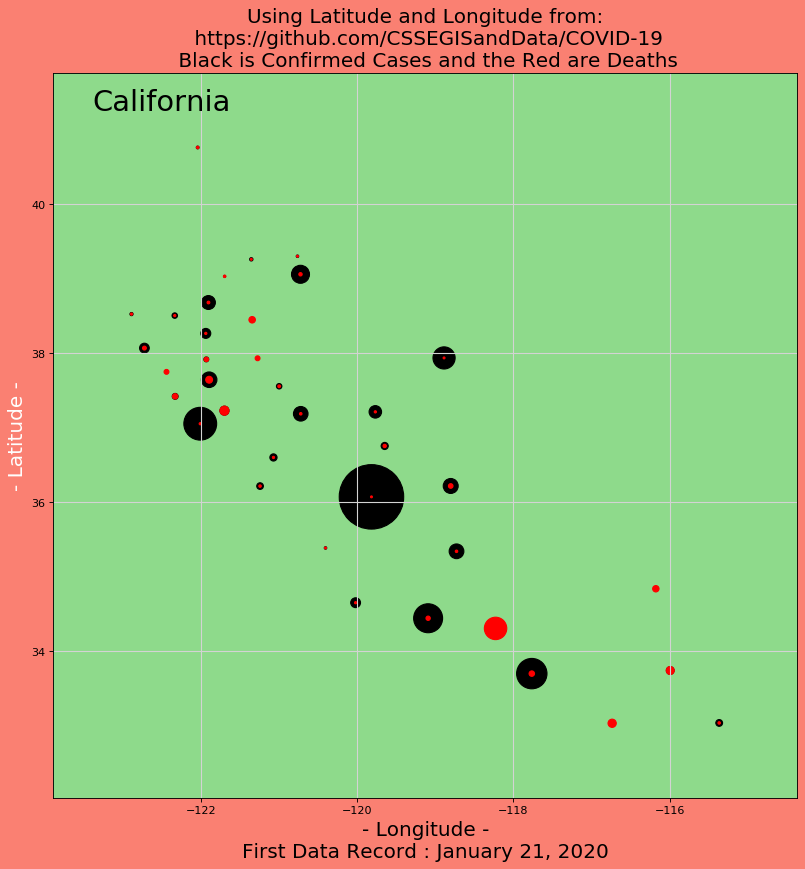

In [5]:
from matplotlib.pyplot import text
from matplotlib import pyplot as plt
import numpy as np
#import mpld3
#from mpld3 import plugins
import time
%matplotlib inline
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"
DataIn = open(LASTFILE).readlines()
cases=[]
for line in DataIn:
    if len(line)>10 and 'US' in line and "Recovered" not in line and "Unassigned" not in line:
        line=line.replace("\n","")
        line = line.lstrip(",")
        line = line.split(",")
        End=len(line)-1
        if len(line)>5 and "Florida" in line[6] and "Out of FL" not in line:
            cases.append(line[End])        

LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
CITY=[]
deaths=[]
TEXT=[]
cnt = -1
Total=0
SEARCH = "California"
for line in DataIn:
    if len(line)>10 and 'US' in line and "Recovered" not in line and "Unassigned" not in line:
        cnt=cnt+1
        line=line.replace("\n","")
        line = line.lstrip(",")
        line = line.split(",")
        End=len(line)-1
        if len(line)>5 and SEARCH in line[6] and "0.0" not in line:
            if cnt>=1 and cnt<=5:print(line[5],line[6],line[8],line[9], line[End] )
            Total=Total+int(line[End])
            CITY.append(line[5])
            LAT.append(line[8])
            LONG.append(line[9])
            deaths.append(line[End])        
            text = str(line[2]+' '+line[1]+' '+line[3]+' '+line[4]+' '+line[5]+' '+line[6]+' '+line[7]+' '+line[8]+' '+line[9]+' '+line[10])
            TEXT.append(text)
            
print("Number of Cities: ",len(CITY)) 
print("Total Deaths: ",Total)

LA = LAT
LO = LONG

print(len(LA))
print(len(LO))

DA = np.array(deaths,dtype=np.int)
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print (max(LG))
print (min(LG))
print (min(LT))
print (max(LT))

A = (min(LG))-1
B = (max(LG))+1
C = (min(LT))-1
D = (max(LT))+1

fig = plt.figure(num=None, figsize=(12,12), dpi=80, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()

#ax.set_facecolor('xkcd:green')
ax.set_facecolor(('#8eda8b'))

Sd=1
Sized=[]
for xd in deaths:
    Sd=2+(float(xd)*1)
    Sized.append(int(Sd))
    #print(int(S))
sd = np.array(Sized)

S=1
Size=[]
for x in cases:
    S=2+(float(x)*1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

plt.text(A+.5, D-.5, SEARCH, fontsize=26)
#plt.text(-119, 41, SEARCH, fontsize=26)
#plt.axis([-130,-65,20,55])
plt.axis([A,B,C,D])

ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=s, color="black")
plt.scatter(LG, LT, s=sd, color="red")
plt.grid(True)

plt.xlabel('- Longitude -\nFirst Data Record : January 21, 2020', fontsize=18)
plt.title('Using Latitude and Longitude from:\n https://github.com/CSSEGISandData/COVID-19\n Black is Confirmed Cases and the Red are Deaths', fontsize=18)
plt.ylabel('- Latitude -', fontsize=18, color="white")
filename = "images/"+SEARCH+"_"+(time.strftime('%a_%d_%b_%Y_%I_%M_%S_%p_%Z', time.gmtime())+".png")
fig.savefig(filename, facecolor=fig.get_facecolor(), edgecolor='black')
print(filename)
plt.show()

In [ ]:
from matplotlib.pyplot import text
from matplotlib import pyplot as plt
import numpy as np
import mpld3
from mpld3 import plugins
import time
%matplotlib inline
#LASTFILE="DATA/Download.csv"
#DataIn = open(LASTFILE).readlines()
cases=[]
#cnt=cnt+1
#for line in DataIn:
#    line = line.split(",")
#    if cnt==0:print(line)

LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv"
DataIn = open(LASTFILE).readlines()
LAT=[]
LONG=[]
CITY=[]
deaths=[]
TEXT=[]
cnt = -1
Total=0
SEARCH = "Mississippi"
for line in DataIn:
    if len(line)>10 and 'US' in line and "Recovered" not in line and "Unassigned" not in line:
        cnt=cnt+1
        line=line.replace("\n","")
        line = line.lstrip(",")
        line = line.split(",")
        End=len(line)-1
        if len(line)>5 and SEARCH in line[6] and "0.0" not in line:
            
            if cnt>=1 and cnt<=5:print(line[5],line[6],line[8],line[9], line[End] )
            Total=Total+int(line[End])
            CITY.append(line[5])
            LAT.append(line[8])
            LONG.append(line[9])
            cases.append(line[9])
            deaths.append(line[End])        
            TText = str(line[2]+' '+line[1]+' '+line[3]+' '+line[4]+' '+line[5]+' '+line[6]+' '+line[7]+' '+line[8]+' '+line[9]+' '+line[10])
            if cnt==10:print("TTEXT: ",TText)
            TEXT.append(TText)
            
print("Number of Cities: ",len(CITY)) 
print("Total Deaths: ",Total)

LA = LAT
LO = LONG

print(len(LA))
print(len(LO))

DA = np.array(deaths,dtype=np.int)
LT = np.array(LAT,dtype=np.float)
LG = np.array(LONG,dtype=np.float)
print (max(LG))
print (min(LG))
print (min(LT))
print (max(LT))

print(deaths[-1])


A = (min(LG))-1
B = (max(LG))+1
C = (min(LT))-1
D = (max(LT))+1

fig = plt.figure(num=None, figsize=(12,12), dpi=80, facecolor='salmon')
#fig = plt.figure()
ax = fig.gca()
ax.set_facecolor(('#8eda8b'))

Sd=5
Sized=[]
for xd in deaths:
    Sd=2+(float(xd)*1)
    Sized.append(int(Sd))
    #print(int(S))
sd = np.array(Sized)

S=5
Size=[]
for x in cases:
    S=2+(float(x)*2)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

plt.text(A+.5, D-.5, SEARCH, fontsize=26)
#plt.axis([-130,-65,20,55])
plt.axis([A,B,C,D])

ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.scatter(LG, LT, s=sd, color="red")
plt.scatter(LG, LT, s=s, color="black")

plt.grid(True)

plt.xlabel('- Longitude -\nFirst Data Record : January 21, 2020', fontsize=18)
plt.title('Using Latitude and Longitude from:\n https://github.com/CSSEGISandData/COVID-19\n Black is Confirmed Cases and the Red are Deaths', fontsize=18)
plt.ylabel('- Latitude -', fontsize=18, color="white")
filename = "images/"+SEARCH+"_"+(time.strftime('%a_%d_%b_%Y_%I_%M_%S_%p_%Z', time.gmtime())+".png")
fig.savefig(filename, facecolor=fig.get_facecolor(), edgecolor='black')
print(filename)
plt.show()

In [ ]:
filename = "images/"+SEARCH+"_"+(time.strftime('%a_%d_%b_%Y_%I_%M_%S_%p_%Z', time.gmtime())+".png")
fig.savefig(filename, facecolor=fig.get_facecolor(), edgecolor='black')
print(filename)
plt.show()

In [ ]:
filename = "images/"+SEARCH+"_"+(time.strftime('%a_%d_%b_%Y_%I_%M_%S_%p_%Z', time.gmtime())+".png")
fig.savefig(filename, facecolor=fig.get_facecolor(), edgecolor='black')
print(filename)
plt.show()

In [ ]:
data = open("/home/jack/Desktop/COVID-19-Jupyter-Notebooks/uscities.csv").readlines()
cnt=0
LatLong =input("LatLong: ")
LatLong=LatLong.split(" ")
print(LatLong[1],LatLong[0])
lat=LatLong[1]
lng=LatLong[0]
for line in data:
    line=line.replace("\"","")
    line = line.split(",")
    cnt=cnt+1
    if LatLong[1] == line:print(line)
    if LatLong[0] == line:print(line)
        

In [ ]:
data = open("/home/jack/Desktop/COVID-19-Jupyter-Notebooks/uscities.csv").readlines()
cnt=0
LatLong =input("LatLong: ")
LatLong=LatLong.split(" ")
print(LatLong[1],LatLong[0])
for line in data:
    line=line.replace("\"","")
    line = line.split(",")
    cnt=cnt+1
    if cnt==2:print(round(float(LatLong[1]),3),round(float(LatLong[0]),3)),round(float(line[8]),3),round(float(line[9]),3)
    if cnt>2 and round(float(LatLong[1]),3)==round(float(line[8]),3):
        print("line",line[0],line[3])
    if cnt>2 and round(float(LatLong[0]),3)==round(float(line[9]),3):
            print("XXX",line[0],line[3])    

In [ ]:
LatLong =input("LatLong: ")
LatLong=LatLong.split(",")
print(LatLong[0],LatLong[1])
lat=LatLong[0]
lng=LatLong[1]

In [ ]:
import reverse_geocoder as rg 
import pprint 
  
def reverseGeocode(coordinates): 
    result = rg.search(coordinates) 
      
    # result is a list containing ordered dictionary. 
    pprint.pprint(result)  

LatLong =input("LatLong: ")
LatLong=LatLong.split(",")
print(LatLong[0],LatLong[1])
lat=LatLong[0]
lng=LatLong[1]

coordinates =(lat,lng) 
     
reverseGeocode(coordinates)  

In [ ]:
%matplotlib notebook
import mplcursors
from matplotlib.pyplot import text
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import numpy as np
import mpld3
from mpld3 import plugins
from PIL import Image
import ipywidgets as wdg 
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-14-2020.csv"

DataIn = open(LASTFILE).readlines()
cnt=-1
LAT =[]
LON =[]
cases = []
COORD=[]
STate = input("Which State? ")
for lines in DataIn:
    lines = lines.replace("\n","")
    line = lines.split(",")
    if STate in line[2] and len(line[5])>8 and len(line[6])>4:
        cnt=cnt+1
        if cnt<5:
            print(" ")
            #print(line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8])
        LAT.append(line[5]) 
        LON.append(line[6])
        cases.append(int(line[7]))
LA = LAT
LO = LON
LT = np.array(LAT,dtype=np.float)
LG = np.array(LON,dtype=np.float)

fig = plt.figure(num=None, figsize=(12,12), dpi=80, facecolor='salmon')
ax = fig.gca()
ax.set_facecolor(('#c2efc1'))

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

A =(min(LG))-1
B =(max(LG))+1
C =(min(LT))-1
D =(max(LT))+1


longLeft= (min(LG))-3
longRight = (max(LG))+3
lat1 = (min(LT))-3
lat2 = (max(LT))+3

ax = fig.gca()
T= STate
text(0.62, 0.29, T, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=20)

# Create and display textarea widget
txt = wdg.Textarea(
    value='',
    placeholder='',
    description='event:',
    disabled=False
)
display(txt)

COORD.append(txt)
# Define a callback function that will update the textarea
def onclick(event):
    COORD=[]
    txt.value = str(event)  # Dynamically update the text box above

# Create an hard reference to the callback not to be cleared by the garbage collector
ka = fig.canvas.mpl_connect('button_press_event', onclick)

plt.axis([longLeft,longRight,lat1,lat2])
plt.axis([A,B,C,D])

ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.grid(True)
plt.scatter(LG, LT, s=s, color="black")


plt.xlabel('First data sample was taken: 01/20/2020', fontsize=24)
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
mplcursors.cursor(hover=True)

plt.show()

In [ ]:
import reverse_geocoder as rg 
import pprint 
def Reverse(tuples): 
    new_tup = tuples[::-1] 
    return new_tup   
def reverseGeocode(coordinates): 
    result = rg.search(coordinates) 
      
    # result is a list containing ordered dictionary. 
    pprint.pprint(result)  

for line in COORD:
    coordinates = ((str(line).split('xydata=('))[1].split(') button=1')[0])
    res = tuple(map(float, coordinates.split(', ')))
    dat = Reverse(res)
    reverseGeocode(dat)